In [ ]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input,Dense,Dropout 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten ,BatchNormalization
import cv2
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:


inputs = Input(shape=(32,32,3))
x = Conv2D(filters = 64, kernel_size = 5, activation = 'relu')(inputs)
x = MaxPooling2D()(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 32,        
kernel_size = 3,            
activation = 'relu')(x)  
x = MaxPooling2D()(x) 

x=Dropout(0.2)(x)

x = Flatten()(x) 
x=Dense(256,
activation='relu')(x)
x=Dense(128,
activation='relu')(x)
outputs = Dense(36, activation = 'softmax')(x) 
 
model = Model(inputs = inputs, outputs = outputs) 
 
model.summary() 
 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0     

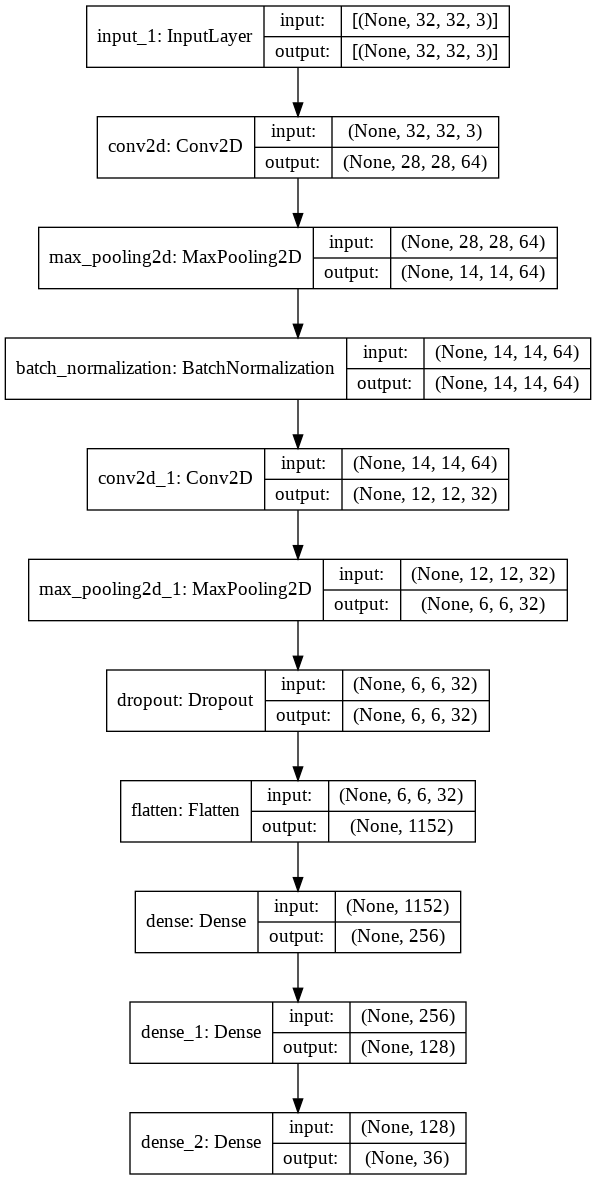

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
import os
import tensorflow.keras
checkpoint_path='drive/MyDrive/Final_Training/cp.ckpt'
checkpoint_dir=os.path.dirname(checkpoint_path)
cp_callback=tensorflow.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

In [ ]:
from tensorflow.keras.utils import plot_model 
model.compile(
	optimizer='adam', 
	loss='categorical_crossentropy', 
	metrics=['accuracy']) 
data_gen_train = ImageDataGenerator(rescale=1/255)



data_gen_valid = ImageDataGenerator(rescale=1/255)

train_generator = data_gen_train.flow_from_directory(directory=r"./drive/My Drive/NHCR_DATASET/Training_Dataset/Training", target_size=(32,32), batch_size=20)

valid_generator = data_gen_valid.flow_from_directory(directory=r"./drive/My Drive/NHCR_DATASET/Validation_Dataset/Validation", target_size=(32,32), batch_size=10)
 

history=model.fit(
	train_generator,
	epochs =50, 
	steps_per_epoch=1262,
	validation_steps=540,
	validation_data=valid_generator,
  callbacks=[cp_callback]
	) 
model.save('drive/MyDrive/saved_model/Saved_model.h5')




Found 25241 images belonging to 36 classes.
Found 5409 images belonging to 36 classes.
Epoch 1/50
1262/1262 [==============================] - 8295s 7s/step - loss: 2.1779 - accuracy: 0.3863 - val_loss: 0.6420 - val_accuracy: 0.8037

Epoch 00001: saving model to drive/MyDrive/Final_Training/cp.ckpt
Epoch 2/50
1262/1262 [==============================] - 41s 32ms/step - loss: 0.3503 - accuracy: 0.8867 - val_loss: 0.4744 - val_accuracy: 0.8531

Epoch 00002: saving model to drive/MyDrive/Final_Training/cp.ckpt
Epoch 3/50
1262/1262 [==============================] - 39s 31ms/step - loss: 0.2190 - accuracy: 0.9284 - val_loss: 0.5031 - val_accuracy: 0.8572

Epoch 00003: saving model to drive/MyDrive/Final_Training/cp.ckpt
Epoch 4/50
1262/1262 [==============================] - 39s 31ms/step - loss: 0.1677 - accuracy: 0.9454 - val_loss: 0.4706 - val_accuracy: 0.8780

Epoch 00004: saving model to drive/MyDrive/Final_Training/cp.ckpt
Epoch 5/50
1262/1262 [==============================] - 40s 3

In [ ]:
model.save("saved_model_36.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#this code is for predicting a single character image.
def prediction(x): 

  switcher ={0:'क', 'कं': 1, 'कः': 2, 'का': 3, 'कि': 4, 'की': 5, 'कु': 6, 'कू': 7, 8:'के', 'कै': 9, 'को': 10, 'कौ': 11, 'ख': 12, 'खं': 13, 'खः': 14, 15:'खा', 'खि': 16, 'खी': 17, 'खु': 18, 'खू': 19, 'खे': 20, 'खै': 21, 22:'खो', 'खौ': 23, 'ग': 24, 'गं': 25, 26:'गः', 'गा': 27, 'गि': 28, 'गी': 29, 'गु': 30, 31:'गू', 32:'गे', 'गै': 33, 'गो': 34, 'गौ': 35}


  return switcher.get(x) 


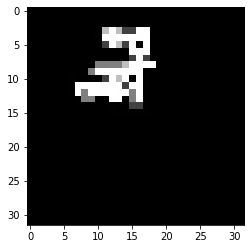

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2 
#Image to predict to out model 

# img = cv2.imread(r"./drive/My Drive/NHCR_DATASET/Testing_Dataset/Testing/गे/Gey_1614416485.05734245.jpg") 
img = cv2.imread(r"/content/drive/MyDrive/NHCR_DATASET/Testing_Dataset/Testing/खै/Khhaii_1614416015.8412023.jpg") 

bigger = cv2.resize(img, (32,32))

# /content/drive/My Drive/test_dataset/characters/65238.png
plt.imshow(bigger) 

In [ ]:
img = np.expand_dims(bigger, axis= 0) 
bigger = np.expand_dims(img, axis = -1) 
prediction = model.predict(bigger) 
print("The predicted character is:", prediction(np.argmax(pred))) 

TypeError: ignored

In [ ]:
#this is for reloading the saved trained model.
import tensorflow.keras
model = tensorflow.keras.models.load_model('drive/MyDrive/saved_model/Dhamala_Trained_Model2.h5')
print(model)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0     

In [ ]:
# list all data in history
print(history.history.keys())

NameError: ignored

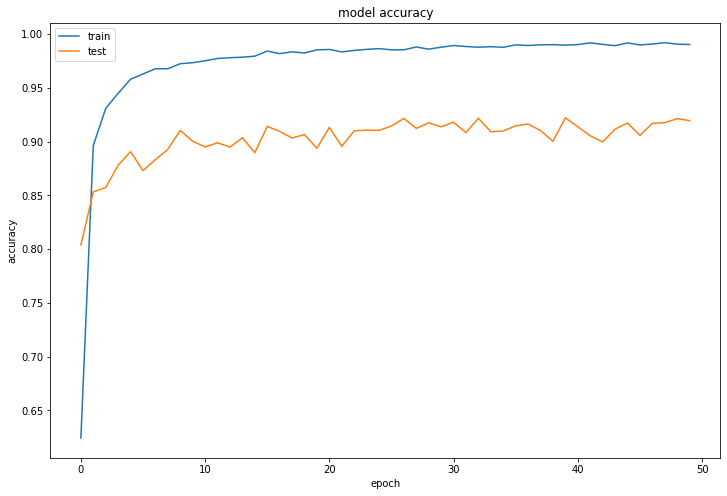

In [ ]:

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

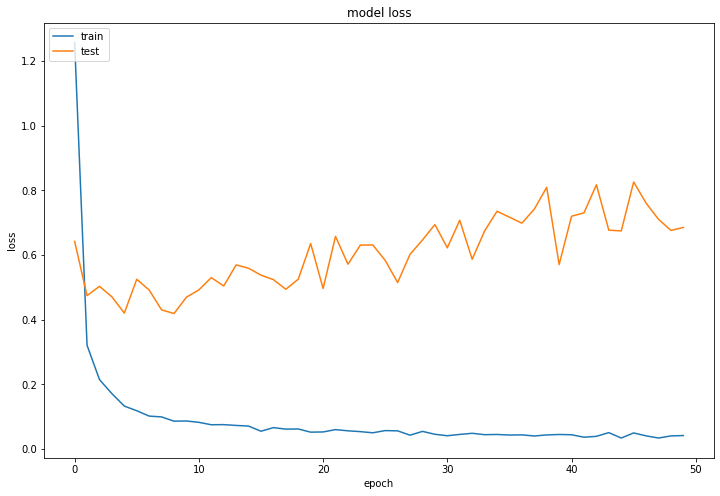

In [ ]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
data_gen_train = ImageDataGenerator(rescale=1/255)



data_gen_valid = ImageDataGenerator(rescale=1/255)

train_generator = data_gen_train.flow_from_directory(directory=r"./drive/My Drive/NHCR_DATASET/Training_Dataset/Training", target_size=(32,32), batch_size=20)

valid_generator = data_gen_valid.flow_from_directory(directory=r"./drive/My Drive/NHCR_DATASET/Validation_Dataset/Validation", target_size=(32,32), batch_size=10)
 

KeyboardInterrupt: ignored

In [ ]:
a=valid_generator.class_indices
print('Validation data classes')
print(a)
b=train_generator.class_indices
print('--------------------------------------------------------------------------------------------------------------------------------------')
print('Training data classes')
print(b)

NameError: ignored

In [ ]:
data_gen_train = ImageDataGenerator(rescale=1/255)
test_generator = data_gen_train.flow_from_directory(directory=r"./drive/My Drive/NHCR_DATASET/Testing_Dataset/Testing", target_size=(32,32), batch_size=30,shuffle=False)



Found 5400 images belonging to 36 classes.


In [ ]:

test_generator.reset()
pred=model.predict(test_generator,
steps=180,
verbose=1)

180/180 [==============================] - 6s 35ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)

[ 0  0  0 ... 35 35 35]


In [ ]:
labels = (test_generator.class_indices)
print(labels)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(labels)

{'क': 0, 'कं': 1, 'कः': 2, 'का': 3, 'कि': 4, 'की': 5, 'कु': 6, 'कू': 7, 'के': 8, 'कै': 9, 'को': 10, 'कौ': 11, 'ख': 12, 'खं': 13, 'खः': 14, 'खा': 15, 'खि': 16, 'खी': 17, 'खु': 18, 'खू': 19, 'खे': 20, 'खै': 21, 'खो': 22, 'खौ': 23, 'ग': 24, 'गं': 25, 'गः': 26, 'गा': 27, 'गि': 28, 'गी': 29, 'गु': 30, 'गू': 31, 'गे': 32, 'गै': 33, 'गो': 34, 'गौ': 35}
{0: 'क', 1: 'कं', 2: 'कः', 3: 'का', 4: 'कि', 5: 'की', 6: 'कु', 7: 'कू', 8: 'के', 9: 'कै', 10: 'को', 11: 'कौ', 12: 'ख', 13: 'खं', 14: 'खः', 15: 'खा', 16: 'खि', 17: 'खी', 18: 'खु', 19: 'खू', 20: 'खे', 21: 'खै', 22: 'खो', 23: 'खौ', 24: 'ग', 25: 'गं', 26: 'गः', 27: 'गा', 28: 'गि', 29: 'गी', 30: 'गु', 31: 'गू', 32: 'गे', 33: 'गै', 34: 'गो', 35: 'गौ'}


In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(test_generator.classes,predicted_class_indices) 
#print(cm)
total=np.sum(cm,axis=1)
#print(total)
cm=np.round(cm/total,2)
print(cm)

[[0.95 0.01 0.   ... 0.   0.   0.  ]
 [0.01 0.92 0.   ... 0.   0.   0.  ]
 [0.   0.01 0.98 ... 0.   0.   0.  ]
 ...
 [0.   0.01 0.   ... 0.9  0.   0.04]
 [0.   0.   0.   ... 0.   0.82 0.07]
 [0.   0.   0.   ... 0.   0.03 0.9 ]]


In [ ]:
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansDevanagari-hinted.zip"


--2021-03-04 10:30:40--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansDevanagari-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.74.128, 2607:f8b0:4001:c0d::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6201435 (5.9M) [application/zip]
Saving to: ‘NotoSansDevanagari-hinted.zip.1’

NotoSansDevanagari- 100%[===================>]   5.91M  --.-KB/s    in 0.03s   

2021-03-04 10:30:40 (217 MB/s) - ‘NotoSansDevanagari-hinted.zip.1’ saved [6201435/6201435]



In [ ]:
!wget "https://dl.1001fonts.com/ananda-akchyar.zip"

--2021-03-04 10:30:28--  https://dl.1001fonts.com/ananda-akchyar.zip
Resolving dl.1001fonts.com (dl.1001fonts.com)... 54.39.182.171
Connecting to dl.1001fonts.com (dl.1001fonts.com)|54.39.182.171|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.1001fonts.com/ananda-akchyar.zip [following]
--2021-03-04 10:30:29--  https://www.1001fonts.com/ananda-akchyar.zip
Resolving www.1001fonts.com (www.1001fonts.com)... 54.39.182.171
Connecting to www.1001fonts.com (www.1001fonts.com)|54.39.182.171|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-03-04 10:30:29 ERROR 404: Not Found.



In [ ]:
!unzip "drive/MyDrive/kantipur.zip"


Archive:  drive/MyDrive/kantipur.zip
replace ka_____0.TTF? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: ka_____0.TTF            


In [ ]:
!mv NotoSansDevanagariUI-Regular.ttf /usr/share/fonts/truetype/

mv: cannot stat 'NotoSansDevanagariUI-Regular.ttf': No such file or directory


In [ ]:
import matplotlib.font_manager as fm

# fetch the name of font that was installed
path = 'NotoSansDevanagariUI-Regular.ttf'
fontprop = fm.FontProperties(fname=path)
print(fontprop)

sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=NotoSansDevanagariUI-Regular.ttf:size=10.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


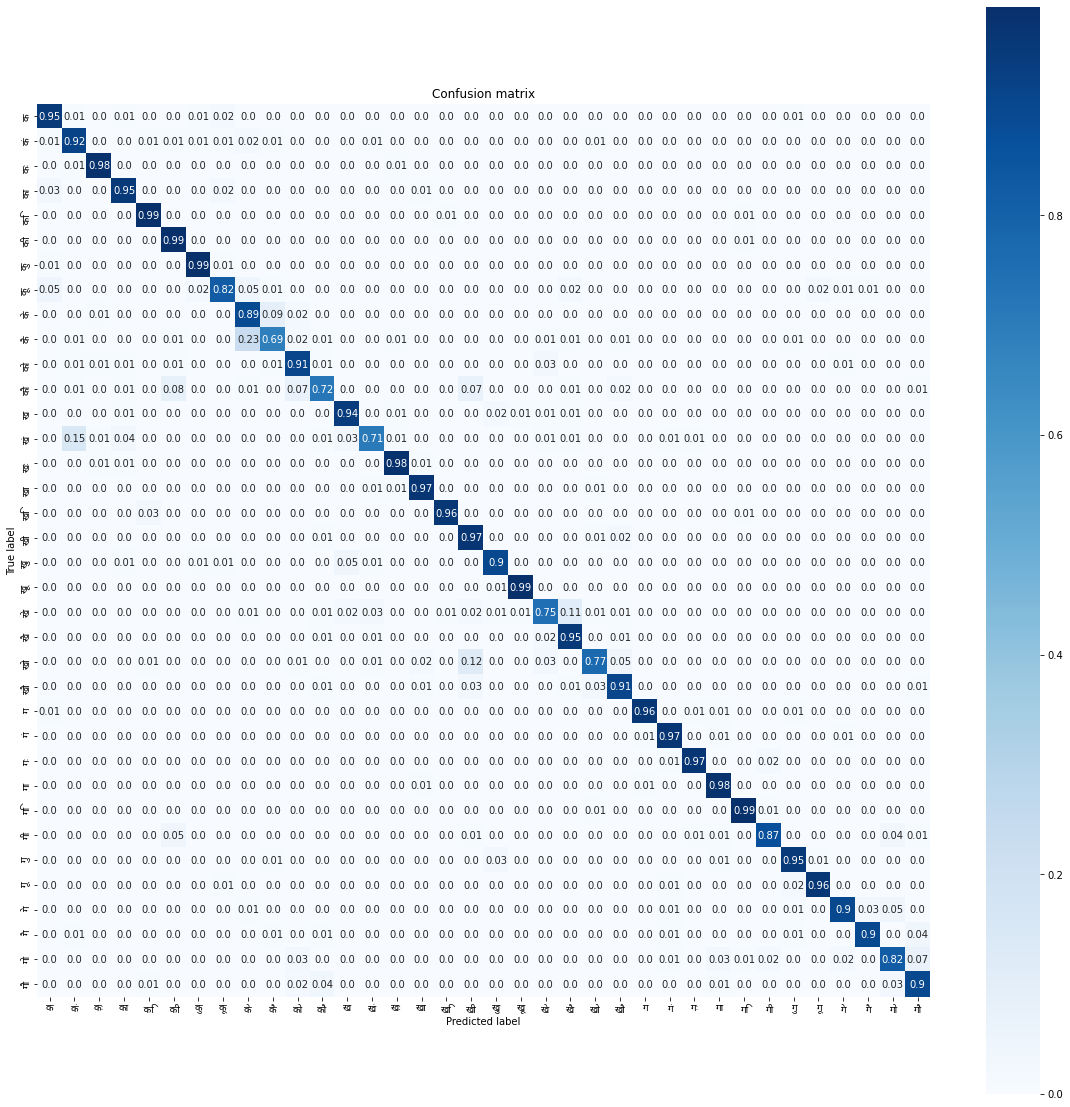

In [ ]:

import seaborn as sns
from matplotlib import pyplot as plt

class_names=['क' , 'कं' , 'कः' , 'का' , ' कि ' , ' की' , 'कु' , 'कू' , 'के' , 'कै' , 'को' , 'कौ' , 'ख' , 'खं' , 'खः' , 'खा' , 'खि' , 'खी' , 'खु' , 'खू' , 'खे' , 'खै' , 'खो' , 'खौ' , 'ग' , 'गं' , 'गः' , 'गा' , 'गि' , 'गी' , 'गु' , 'गू' , 'गे' , 'गै' , 'गो' , 'गौ']
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(cm,annot=True,square= True,fmt ='',cbar = True ,cmap='Blues')
ax.xaxis.set_ticklabels(class_names,fontproperties=fontprop)
ax.yaxis.set_ticklabels(class_names,fontproperties=fontprop)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

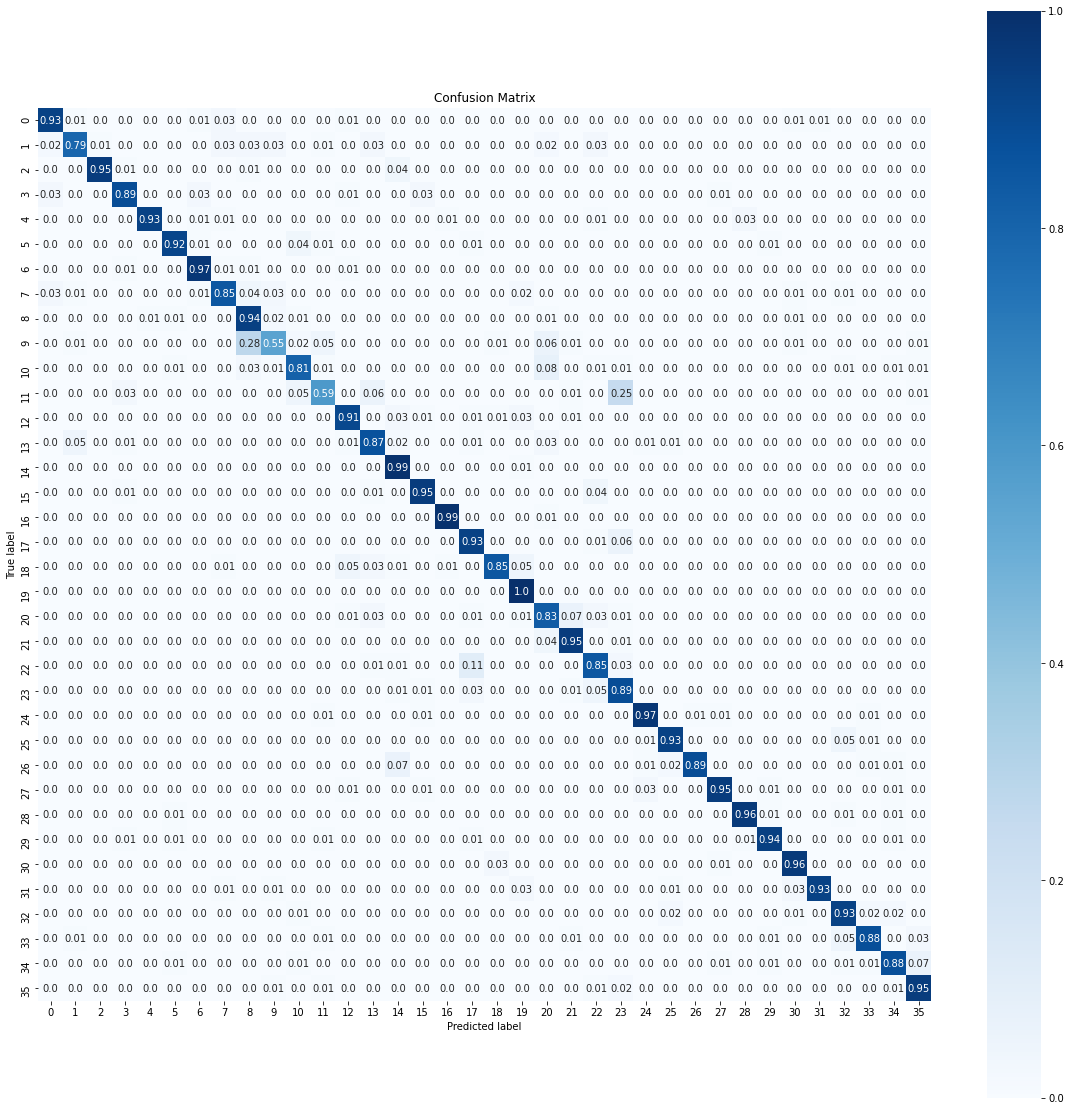

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm,annot=True,square= True,fmt ='',cbar = True,cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_generator.classes,predicted_class_indices)))

print('Micro Precision: {:.2f}'.format(precision_score(test_generator.classes,predicted_class_indices, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test_generator.classes,predicted_class_indices, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test_generator.classes,predicted_class_indices, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(test_generator.classes,predicted_class_indices, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test_generator.classes,predicted_class_indices, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test_generator.classes,predicted_class_indices, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(test_generator.classes,predicted_class_indices, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_generator.classes,predicted_class_indices, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_generator.classes,predicted_class_indices, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print("----------------------------------------------------------")
print(classification_report(test_generator.classes,predicted_class_indices,target_names=['क' , 'कं' , 'कः' , 'का' , ' कि ' , ' की' , 'कु' , 'कू' , 'के' , 'कै' , 'को' , 'कौ' , 'ख' , 'खं' , 'खः' , 'खा' , 'खि' , 'खी' , 'खु' , 'खू' , 'खे' , 'खै' , 'खो' , 'खौ' , 'ग' , 'गं' , 'गः' , 'गा' , 'गि' , 'गी' , 'गु' , 'गू' , 'गे' , 'गै' , 'गो' , 'गौ']))


Accuracy: 0.91

Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.91
Macro Recall: 0.91
Macro F1-score: 0.91

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.91

Classification Report

----------------------------------------------------------
              precision    recall  f1-score   support

           क       0.90      0.95      0.93       150
          कं       0.82      0.92      0.87       150
          कः       0.97      0.98      0.97       150
          का       0.91      0.95      0.93       150
         कि        0.95      0.99      0.97       150
          की       0.86      0.99      0.92       150
          कु       0.96      0.99      0.97       150
          कू       0.91      0.82      0.86       150
          के       0.73      0.89      0.80       150
          कै       0.84      0.69      0.75       150
          को       0.85      0.91      0.88       150
          कौ       0.85      0.72      0.78       150
